# MTA (Metropolitian Transit Authority) Turnstile Data Project

I have analyzed the "**MTA (Metropolitian Transit Authority) Turnstile Data**"

The data contains the following fields:

- C/A - Control Area name/Booth name. This is the internal identification of a booth at a given station.
- Unit - Remote unit ID of station.
- SCP - Subunit/Channel/position represents a specific address for a given device. 
- STATION - Name assigned to the subway station by operations planning. This name is used in all references to stations, as well as in debit/credit purchase receipts, and customer’s bank activity statements.
- LINENAME - Train lines stopping at this location. Can contain up to 20 single character identifier. When more than one train line appears, it is usually intercepting train lines, in major stations where the passenger can transfer between any one of the lines.
- DIVISION - Represents the Line originally the station belonged to BMT, IRT, or IND. Each section of the system is assigned a unique line name, usually paired with its original operating company or division (Brooklyn–Manhattan Transit Corporation (BMT), Interborough Rapid Transit Company (IRT), and Independent Subway System (IND).
- DATE - Represents the date of the audit data.
- TIME - Represents the time of the audit data.
- DESC - Represents the “REGULAR” scheduled audit event (Normally occurs every 4 hours).
- ENTRIES and EXITS are the cumulative values for a device. 

## Data and Setup

____

### Import Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
from datetime import datetime as dt

###  Read the Data:

In [3]:
df_march = pd.read_csv('data_for_march')
df_april = pd.read_csv('data_for_april')
df_may = pd.read_csv('data_for_may')
df_june = pd.read_csv('data_for_june')

In [4]:
df = pd.read_csv('main_data')

### Explore the Data:

In [5]:
df_march.head(2)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,03:00:00,REGULAR,7689737,2671257
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,07:00:00,REGULAR,7689741,2671278


In [6]:
df_june['DATE'].unique()

array(['05/28/2022', '05/29/2022', '05/30/2022', '05/31/2022',
       '06/01/2022', '06/02/2022', '06/03/2022', '06/04/2022',
       '06/05/2022', '06/06/2022', '06/07/2022', '06/08/2022',
       '06/09/2022', '06/10/2022', '06/11/2022', '06/12/2022',
       '06/13/2022', '06/14/2022', '06/15/2022', '06/16/2022',
       '06/17/2022', '06/25/2022', '06/26/2022', '06/27/2022',
       '06/28/2022', '06/29/2022', '06/30/2022', '07/01/2022'],
      dtype=object)

In [7]:
df_april.head(2)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/02/2022,00:00:00,REGULAR,7698997,2686961
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/02/2022,04:00:00,REGULAR,7699002,2686968


In [8]:
df_may.head(2)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2022,00:00:00,REGULAR,7706010,2698804
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/30/2022,04:00:00,REGULAR,7706014,2698808


In [9]:
df_june.head(2)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/28/2022,00:00:00,REGULAR,7717669,2709039
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/28/2022,04:00:00,REGULAR,7717677,2709047


In [10]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,03:00:00,REGULAR,7689737,2671257
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,07:00:00,REGULAR,7689741,2671278
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,11:00:00,REGULAR,7689758,2671380
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,15:00:00,REGULAR,7689791,2671465
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,19:00:00,REGULAR,7689858,2671530


In [11]:
df.sample(11, random_state=48)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
796937,R250,R179,00-00-03,86 ST,456,IRT,03/24/2022,16:00:00,REGULAR,25085383,1946773
3029576,N220,R155,01-00-04,KINGSBRIDGE RD,BD,IND,06/08/2022,09:00:00,REGULAR,352747575,604853650
50329,N040,R251,00-00-00,96 ST,BC,IND,02/26/2022,15:00:00,REGULAR,820969,2324583
669909,J022,R435,00-00-00,CLEVELAND ST,J,BMT,03/19/2022,01:00:00,REGULAR,5452650,6324882
1069494,B032,R264,00-00-01,OCEAN PKWY,Q,BMT,04/02/2022,08:00:00,REGULAR,12517,5699
2059596,R240,R047,00-00-00,GRD CNTRL-42 ST,4567S,IRT,05/01/2022,05:00:00,REGULAR,5959828,17296294
2623524,N405,R239,00-06-04,GREENPOINT AV,G,IND,05/25/2022,20:00:00,REGULAR,553955,118021
1198353,R172,R192,00-00-00,CATHEDRAL PKWY,1,IRT,04/03/2022,17:00:00,REGULAR,203309,96626
2787364,N016A,R296,00-00-00,163 ST-AMSTERDM,C,IND,06/01/2022,21:00:00,REGULAR,194020,102033
886812,N017,R331,00-00-04,155 ST,C,IND,03/27/2022,09:00:00,REGULAR,6174705,1719377


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585059 entries, 0 to 3585058
Data columns (total 11 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   C/A                                                                   object
 1   UNIT                                                                  object
 2   SCP                                                                   object
 3   STATION                                                               object
 4   LINENAME                                                              object
 5   DIVISION                                                              object
 6   DATE                                                                  object
 7   TIME                                                                  object
 8   DESC                                                          

In [13]:
df['DATE'].unique()

array(['02/26/2022', '02/27/2022', '02/28/2022', '03/01/2022',
       '03/02/2022', '03/03/2022', '03/04/2022', '03/05/2022',
       '03/06/2022', '03/07/2022', '03/08/2022', '03/09/2022',
       '03/10/2022', '03/11/2022', '03/12/2022', '03/13/2022',
       '03/14/2022', '03/15/2022', '03/16/2022', '03/17/2022',
       '03/18/2022', '03/19/2022', '03/20/2022', '03/21/2022',
       '03/22/2022', '03/23/2022', '03/24/2022', '03/25/2022',
       '03/26/2022', '03/27/2022', '03/28/2022', '03/29/2022',
       '03/30/2022', '03/31/2022', '04/01/2022', '04/02/2022',
       '04/03/2022', '04/04/2022', '04/05/2022', '04/06/2022',
       '04/07/2022', '04/08/2022', '04/09/2022', '04/10/2022',
       '04/11/2022', '04/12/2022', '04/13/2022', '04/14/2022',
       '04/15/2022', '04/16/2022', '04/17/2022', '04/18/2022',
       '04/19/2022', '04/20/2022', '04/21/2022', '04/22/2022',
       '04/23/2022', '04/24/2022', '04/25/2022', '04/26/2022',
       '04/27/2022', '04/28/2022', '04/29/2022', '04/30

In [14]:
df.tail(11)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
3585048,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/30/2022,05:00:00,REGULAR,0,639
3585049,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/30/2022,09:00:00,REGULAR,0,639
3585050,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/30/2022,13:00:00,REGULAR,0,640
3585051,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/30/2022,17:00:00,REGULAR,0,640
3585052,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/30/2022,21:00:00,REGULAR,0,643
3585053,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/01/2022,01:00:00,REGULAR,0,643
3585054,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/01/2022,05:00:00,REGULAR,0,643
3585055,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/01/2022,09:00:00,REGULAR,0,643
3585056,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/01/2022,13:00:00,REGULAR,0,646
3585057,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/01/2022,17:00:00,REGULAR,0,647


In [15]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,03:00:00,REGULAR,7689737,2671257
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,07:00:00,REGULAR,7689741,2671278
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,11:00:00,REGULAR,7689758,2671380
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,15:00:00,REGULAR,7689791,2671465
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,19:00:00,REGULAR,7689858,2671530


### Data Cleaning:

**Number of unique column items:**

In [16]:
for col_name in df.columns:
    print(col_name, df[col_name].nunique())

C/A 753
UNIT 470
SCP 225
STATION 379
LINENAME 114
DIVISION 6
DATE 119
TIME 67697
DESC 2
ENTRIES 2321749
EXITS                                                                2180213


#### A total number of rows and columns:

In [17]:
df.shape

(3585059, 11)

#### Zero duplicate values:

In [18]:
df.duplicated().sum()

0

In [19]:
df['STATION'].nunique()

# len(df['STATION'].unique()) --> Different way;

379

### Check for Missing Values:

In [20]:
df.isnull().sum()

C/A                                                                     0
UNIT                                                                    0
SCP                                                                     0
STATION                                                                 0
LINENAME                                                                0
DIVISION                                                                0
DATE                                                                    0
TIME                                                                    0
DESC                                                                    0
ENTRIES                                                                 0
EXITS                                                                   0
dtype: int64

#### Look at the data columns:

In [21]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

#### Rename columns:

- I noticed the column of "EXITS" have spaces like that 'EXITS                                                               '.
- I solved the problem as shown below:

In [22]:
df.rename(columns={'EXITS                                                               ':'EXITS'}, inplace = True)
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

- However, we can face this problem for  more than one column. So, at that time, we have to use two ways: 

In [23]:
df.columns = [column.strip() for column in df.columns]
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,03:00:00,REGULAR,7689737,2671257
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,07:00:00,REGULAR,7689741,2671278
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,11:00:00,REGULAR,7689758,2671380
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,15:00:00,REGULAR,7689791,2671465
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,19:00:00,REGULAR,7689858,2671530


In [24]:
df.columns = df.columns.str.strip()

In [25]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

#### Combine 'DATE' and 'TIME' columns and convert to datetime format:

In [26]:
df['DATE'].value_counts()

03/22/2022    31131
04/11/2022    31079
05/29/2022    30701
04/06/2022    30617
06/09/2022    30572
              ...  
03/20/2022    29923
02/26/2022    29921
03/18/2022    29898
05/20/2022    29827
03/13/2022    27218
Name: DATE, Length: 119, dtype: int64

In [27]:
df['DATE'].value_counts().sort_index()

02/26/2022    29921
02/27/2022    29969
02/28/2022    29934
03/01/2022    29966
03/02/2022    29974
              ...  
06/27/2022    30364
06/28/2022    30267
06/29/2022    30272
06/30/2022    30185
07/01/2022    30117
Name: DATE, Length: 119, dtype: int64

In [28]:
df['DATE'].unique()

array(['02/26/2022', '02/27/2022', '02/28/2022', '03/01/2022',
       '03/02/2022', '03/03/2022', '03/04/2022', '03/05/2022',
       '03/06/2022', '03/07/2022', '03/08/2022', '03/09/2022',
       '03/10/2022', '03/11/2022', '03/12/2022', '03/13/2022',
       '03/14/2022', '03/15/2022', '03/16/2022', '03/17/2022',
       '03/18/2022', '03/19/2022', '03/20/2022', '03/21/2022',
       '03/22/2022', '03/23/2022', '03/24/2022', '03/25/2022',
       '03/26/2022', '03/27/2022', '03/28/2022', '03/29/2022',
       '03/30/2022', '03/31/2022', '04/01/2022', '04/02/2022',
       '04/03/2022', '04/04/2022', '04/05/2022', '04/06/2022',
       '04/07/2022', '04/08/2022', '04/09/2022', '04/10/2022',
       '04/11/2022', '04/12/2022', '04/13/2022', '04/14/2022',
       '04/15/2022', '04/16/2022', '04/17/2022', '04/18/2022',
       '04/19/2022', '04/20/2022', '04/21/2022', '04/22/2022',
       '04/23/2022', '04/24/2022', '04/25/2022', '04/26/2022',
       '04/27/2022', '04/28/2022', '04/29/2022', '04/30

In [29]:
pd.to_datetime(df['DATE'])

0         2022-02-26
1         2022-02-26
2         2022-02-26
3         2022-02-26
4         2022-02-26
             ...    
3585054   2022-07-01
3585055   2022-07-01
3585056   2022-07-01
3585057   2022-07-01
3585058   2022-07-01
Name: DATE, Length: 3585059, dtype: datetime64[ns]

In [30]:
df['Date_Time'] = pd.to_datetime(df['DATE'] + ' ' + df['TIME'], format = "%m/%d/%Y %H:%M:%S") 

In [31]:
df.head(2)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date_Time
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,03:00:00,REGULAR,7689737,2671257,2022-02-26 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,07:00:00,REGULAR,7689741,2671278,2022-02-26 07:00:00


- **"C/A", "UNIT", "SCP" and "STATION"** must be grouped together with the datetime to obtain the entries and exits for each turnstile. 
- If these four items are grouped together and have duplicates, it means something is wrong with the turnstyle because it is giving multiple outputs for the same date and time.



In [32]:
df.groupby(["C/A", "UNIT", "SCP", "STATION", "Date_Time"]).ENTRIES.count().reset_index().sort_values("ENTRIES", ascending=False).head(5)

,C/A,UNIT,SCP,STATION,Date_Time,ENTRIES
2873220,R249,R179,01-05-01,86 ST,2022-05-01 20:00:00,2
2873219,R249,R179,01-05-01,86 ST,2022-05-01 16:00:00,2
2873226,R249,R179,01-05-01,86 ST,2022-05-02 20:00:00,2
2873225,R249,R179,01-05-01,86 ST,2022-05-02 16:00:00,2
2873224,R249,R179,01-05-01,86 ST,2022-05-02 12:00:00,2


In [33]:
df_copy = df.copy()
df_copy.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date_Time
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,03:00:00,REGULAR,7689737,2671257,2022-02-26 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,07:00:00,REGULAR,7689741,2671278,2022-02-26 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,11:00:00,REGULAR,7689758,2671380,2022-02-26 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,15:00:00,REGULAR,7689791,2671465,2022-02-26 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,19:00:00,REGULAR,7689858,2671530,2022-02-26 19:00:00


In [34]:
df_copy['Turnstiles_ID'] = df_copy['C/A'] + ' / ' + df_copy['UNIT'] + ' / ' + df_copy['SCP']

In [35]:
df_copy.head(2)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date_Time,Turnstiles_ID
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,03:00:00,REGULAR,7689737,2671257,2022-02-26 03:00:00,A002 / R051 / 02-00-00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/26/2022,07:00:00,REGULAR,7689741,2671278,2022-02-26 07:00:00,A002 / R051 / 02-00-00


#### Drop Unnecessary Columns:

In [36]:
df['LINENAME'].unique()

array(['NQR456W', 'NQRW', 'ACENQRS1237W', 'BDFMNQRW', 'NRW', 'LNQR456W',
       'JNQRZ6W', 'RNW', 'R1W', 'FJMZ', 'JZ', 'JZ456', 'ACJZ2345', 'BQ',
       'S', 'S2345', 'BQS', 'Q', 'R2345', 'R', 'BDNQR', 'BDNQR2345',
       'DFGMNR', 'DNR', 'N', 'ND', 'D', 'DFNQ', 'FQ', 'ACEL', 'FLM123',
       'L', 'LG', 'LM', 'A', 'E', 'JMZ', 'JM', 'J', 'M', 'AC1', 'C',
       'ABCD', 'BC', 'ACBD', 'ABCD1', 'CE', 'ACENGRS1237W', 'ACE',
       'ABCDEFM', 'ACE23', '2345ACJZ', 'AC', 'ACF', 'ACG', 'ACS', 'ACJLZ',
       'AS', 'BD', 'BD4', 'BDE', 'EM', 'EM6', 'EMG', 'EMR', 'MR', 'EFMR7',
       'EFMR', 'EF', 'F', 'G', 'GL', 'BDFM', 'BDFM7', 'FM', 'BDFQ6', 'FG',
       'EJZ', '1', '1RW', '23', '23ACE', '123', '123FLM', '123ACE',
       '1237ACENQRSW', '1237ACENQRS', '1ABCD', '1AC', '45', '456JZ', '6',
       '6DF', '456LNQRW', '4567S', '456NQRW', '456', '245', '4BD', '4',
       '3', '25', '2', '7BDFM', '7', '7NQW', 'NQW', '7EFMR', '2345R',
       '2345', '2345BDNQR', '2345S', '34', '5'], dtype=object)

In [37]:
df_copy.drop(columns=['C/A', 'UNIT', 'SCP', 'LINENAME'], inplace=True)

In [38]:
df_copy.head(2)

,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date_Time,Turnstiles_ID
0,59 ST,BMT,02/26/2022,03:00:00,REGULAR,7689737,2671257,2022-02-26 03:00:00,A002 / R051 / 02-00-00
1,59 ST,BMT,02/26/2022,07:00:00,REGULAR,7689741,2671278,2022-02-26 07:00:00,A002 / R051 / 02-00-00


- "C/A", "UNIT", "SCP" and "STATION" must be grouped together with the datetime to obtain the entries and exits for each turnstile.

In [39]:
duplicate_entries = df_copy.groupby(['Turnstiles_ID', 'STATION', 'Date_Time']).ENTRIES.count().reset_index().sort_values("ENTRIES", ascending=False)

In [40]:
duplicate_entries[duplicate_entries['ENTRIES'] == 2].sum()

C:\Users\Acer\AppData\Local\Temp\ipykernel_20080\2261490701.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  duplicate_entries[duplicate_entries['ENTRIES'] == 2].sum()


Turnstiles_ID    R249 / R179 / 01-05-01R249 / R179 / 01-05-01R2...
STATION          86 ST86 ST86 ST86 ST86 ST86 ST86 ST86 ST86 ST8...
ENTRIES                                                        138
dtype: object

In [41]:
duplicate_exits = df_copy.groupby(['Turnstiles_ID', 'STATION', 'Date_Time']).EXITS.count().reset_index().sort_values("EXITS", ascending=False)

In [42]:
duplicate_exits[duplicate_exits['EXITS'] ==2].sum()

C:\Users\Acer\AppData\Local\Temp\ipykernel_20080\797779027.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  duplicate_exits[duplicate_exits['EXITS'] ==2].sum()


Turnstiles_ID    R249 / R179 / 01-05-01R249 / R179 / 01-05-01R2...
STATION          86 ST86 ST86 ST86 ST86 ST86 ST86 ST86 ST86 ST8...
EXITS                                                          138
dtype: object

In [43]:
duplicate_entries.head()

,Turnstiles_ID,STATION,Date_Time,ENTRIES
2873220,R249 / R179 / 01-05-01,86 ST,2022-05-01 20:00:00,2
2873219,R249 / R179 / 01-05-01,86 ST,2022-05-01 16:00:00,2
2873226,R249 / R179 / 01-05-01,86 ST,2022-05-02 20:00:00,2
2873225,R249 / R179 / 01-05-01,86 ST,2022-05-02 16:00:00,2
2873224,R249 / R179 / 01-05-01,86 ST,2022-05-02 12:00:00,2


- These four items are grouped together and have duplicates, it means something is wrong. So I tried to clarify what was wrong. 

- For example, On 01(month)/15(day), I seem to have two entries for same time.

In [44]:
mask = ((df['C/A'] == 'R249') &
        (df['UNIT'] == 'R179') &
        (df['SCP'] == '01-05-01') &
        (df['STATION'] == '86 ST') &
        (df['DATE'] == '05/01/2022')) 

In [45]:
df[mask]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date_Time
2064611,R249,R179,01-05-01,86 ST,456,IRT,05/01/2022,00:00:00,REGULAR,393216,357,2022-05-01 00:00:00
2064612,R249,R179,01-05-01,86 ST,456,IRT,05/01/2022,00:00:00,RECOVR AUD,131072,253,2022-05-01 00:00:00
2064613,R249,R179,01-05-01,86 ST,456,IRT,05/01/2022,04:00:00,REGULAR,393216,358,2022-05-01 04:00:00
2064614,R249,R179,01-05-01,86 ST,456,IRT,05/01/2022,04:00:00,RECOVR AUD,131072,253,2022-05-01 04:00:00
2064615,R249,R179,01-05-01,86 ST,456,IRT,05/01/2022,08:00:00,REGULAR,393216,359,2022-05-01 08:00:00
2064616,R249,R179,01-05-01,86 ST,456,IRT,05/01/2022,08:00:00,RECOVR AUD,131072,253,2022-05-01 08:00:00
2064617,R249,R179,01-05-01,86 ST,456,IRT,05/01/2022,12:00:00,REGULAR,393216,361,2022-05-01 12:00:00
2064618,R249,R179,01-05-01,86 ST,456,IRT,05/01/2022,12:00:00,RECOVR AUD,131072,253,2022-05-01 12:00:00
2064619,R249,R179,01-05-01,86 ST,456,IRT,05/01/2022,16:00:00,REGULAR,393216,366,2022-05-01 16:00:00
2064620,R249,R179,01-05-01,86 ST,456,IRT,05/01/2022,16:00:00,RECOVR AUD,131072,253,2022-05-01 16:00:00


- I saw that DESC is divided into REGULAR and RECOVER AUD:

In [46]:
df['DESC'].value_counts()

REGULAR       3569615
RECOVR AUD      15444
Name: DESC, dtype: int64

In [47]:
df_copy.sort_values(['Turnstiles_ID', 'STATION', 'Date_Time'], ascending=False, inplace=True)

In [48]:
df_copy.head(11) # Sorted from February 26 to July 1;

,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date_Time,Turnstiles_ID
3585058,RIT-ROOSEVELT,RIT,07/01/2022,21:00:00,REGULAR,0,648,2022-07-01 21:00:00,TRAM2 / R469 / 00-05-01
3585057,RIT-ROOSEVELT,RIT,07/01/2022,17:00:00,REGULAR,0,647,2022-07-01 17:00:00,TRAM2 / R469 / 00-05-01
3585056,RIT-ROOSEVELT,RIT,07/01/2022,13:00:00,REGULAR,0,646,2022-07-01 13:00:00,TRAM2 / R469 / 00-05-01
3585055,RIT-ROOSEVELT,RIT,07/01/2022,09:00:00,REGULAR,0,643,2022-07-01 09:00:00,TRAM2 / R469 / 00-05-01
3585054,RIT-ROOSEVELT,RIT,07/01/2022,05:00:00,REGULAR,0,643,2022-07-01 05:00:00,TRAM2 / R469 / 00-05-01
3585053,RIT-ROOSEVELT,RIT,07/01/2022,01:00:00,REGULAR,0,643,2022-07-01 01:00:00,TRAM2 / R469 / 00-05-01
3585052,RIT-ROOSEVELT,RIT,06/30/2022,21:00:00,REGULAR,0,643,2022-06-30 21:00:00,TRAM2 / R469 / 00-05-01
3585051,RIT-ROOSEVELT,RIT,06/30/2022,17:00:00,REGULAR,0,640,2022-06-30 17:00:00,TRAM2 / R469 / 00-05-01
3585050,RIT-ROOSEVELT,RIT,06/30/2022,13:00:00,REGULAR,0,640,2022-06-30 13:00:00,TRAM2 / R469 / 00-05-01
3585049,RIT-ROOSEVELT,RIT,06/30/2022,09:00:00,REGULAR,0,639,2022-06-30 09:00:00,TRAM2 / R469 / 00-05-01


In [49]:
df_copy.drop_duplicates(subset=['Turnstiles_ID', 'STATION', 'Date_Time'], inplace=True)

In [50]:
df_copy.sort_values(['Turnstiles_ID', 'STATION', 'Date_Time'], ascending=True)

,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date_Time,Turnstiles_ID
0,59 ST,BMT,02/26/2022,03:00:00,REGULAR,7689737,2671257,2022-02-26 03:00:00,A002 / R051 / 02-00-00
1,59 ST,BMT,02/26/2022,07:00:00,REGULAR,7689741,2671278,2022-02-26 07:00:00,A002 / R051 / 02-00-00
2,59 ST,BMT,02/26/2022,11:00:00,REGULAR,7689758,2671380,2022-02-26 11:00:00,A002 / R051 / 02-00-00
3,59 ST,BMT,02/26/2022,15:00:00,REGULAR,7689791,2671465,2022-02-26 15:00:00,A002 / R051 / 02-00-00
4,59 ST,BMT,02/26/2022,19:00:00,REGULAR,7689858,2671530,2022-02-26 19:00:00,A002 / R051 / 02-00-00
...,...,...,...,...,...,...,...,...,...
3585054,RIT-ROOSEVELT,RIT,07/01/2022,05:00:00,REGULAR,0,643,2022-07-01 05:00:00,TRAM2 / R469 / 00-05-01
3585055,RIT-ROOSEVELT,RIT,07/01/2022,09:00:00,REGULAR,0,643,2022-07-01 09:00:00,TRAM2 / R469 / 00-05-01
3585056,RIT-ROOSEVELT,RIT,07/01/2022,13:00:00,REGULAR,0,646,2022-07-01 13:00:00,TRAM2 / R469 / 00-05-01
3585057,RIT-ROOSEVELT,RIT,07/01/2022,17:00:00,REGULAR,0,647,2022-07-01 17:00:00,TRAM2 / R469 / 00-05-01


- **I checked if the problem is solved:**

In [51]:
duplicate_entries = df_copy.groupby(['Turnstiles_ID', 'STATION', 'Date_Time']).ENTRIES.count().reset_index().sort_values("ENTRIES", ascending=False)

In [52]:
duplicate_entries[duplicate_entries['ENTRIES'] == 2].sum()

C:\Users\Acer\AppData\Local\Temp\ipykernel_20080\2261490701.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  duplicate_entries[duplicate_entries['ENTRIES'] == 2].sum()


Turnstiles_ID    0.0
STATION          0.0
ENTRIES          0.0
dtype: float64

In [53]:
duplicate_exits = df_copy.groupby(['Turnstiles_ID', 'STATION', 'Date_Time']).EXITS.count().reset_index().sort_values("EXITS", ascending=False)

In [54]:
duplicate_exits[duplicate_exits['EXITS'] ==2].sum()

C:\Users\Acer\AppData\Local\Temp\ipykernel_20080\797779027.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  duplicate_exits[duplicate_exits['EXITS'] ==2].sum()


Turnstiles_ID    0.0
STATION          0.0
EXITS            0.0
dtype: float64

In [55]:
duplicate_entries.head()

,Turnstiles_ID,STATION,Date_Time,ENTRIES
0,A002 / R051 / 02-00-00,59 ST,2022-02-26 03:00:00,1
2389997,R142 / R293 / 01-06-01,34 ST-PENN STA,2022-05-19 18:00:00,1
2389986,R142 / R293 / 01-06-01,34 ST-PENN STA,2022-05-17 22:00:00,1
2389987,R142 / R293 / 01-06-01,34 ST-PENN STA,2022-05-18 02:00:00,1
2389988,R142 / R293 / 01-06-01,34 ST-PENN STA,2022-05-18 06:00:00,1


In [56]:
df_copy.sort_values(['Turnstiles_ID', 'STATION', 'Date_Time'], ascending=True)

,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date_Time,Turnstiles_ID
0,59 ST,BMT,02/26/2022,03:00:00,REGULAR,7689737,2671257,2022-02-26 03:00:00,A002 / R051 / 02-00-00
1,59 ST,BMT,02/26/2022,07:00:00,REGULAR,7689741,2671278,2022-02-26 07:00:00,A002 / R051 / 02-00-00
2,59 ST,BMT,02/26/2022,11:00:00,REGULAR,7689758,2671380,2022-02-26 11:00:00,A002 / R051 / 02-00-00
3,59 ST,BMT,02/26/2022,15:00:00,REGULAR,7689791,2671465,2022-02-26 15:00:00,A002 / R051 / 02-00-00
4,59 ST,BMT,02/26/2022,19:00:00,REGULAR,7689858,2671530,2022-02-26 19:00:00,A002 / R051 / 02-00-00
...,...,...,...,...,...,...,...,...,...
3585054,RIT-ROOSEVELT,RIT,07/01/2022,05:00:00,REGULAR,0,643,2022-07-01 05:00:00,TRAM2 / R469 / 00-05-01
3585055,RIT-ROOSEVELT,RIT,07/01/2022,09:00:00,REGULAR,0,643,2022-07-01 09:00:00,TRAM2 / R469 / 00-05-01
3585056,RIT-ROOSEVELT,RIT,07/01/2022,13:00:00,REGULAR,0,646,2022-07-01 13:00:00,TRAM2 / R469 / 00-05-01
3585057,RIT-ROOSEVELT,RIT,07/01/2022,17:00:00,REGULAR,0,647,2022-07-01 17:00:00,TRAM2 / R469 / 00-05-01



> **I found how many entries there are daily:**

In [57]:
df_copy.head()

,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date_Time,Turnstiles_ID
3585058,RIT-ROOSEVELT,RIT,07/01/2022,21:00:00,REGULAR,0,648,2022-07-01 21:00:00,TRAM2 / R469 / 00-05-01
3585057,RIT-ROOSEVELT,RIT,07/01/2022,17:00:00,REGULAR,0,647,2022-07-01 17:00:00,TRAM2 / R469 / 00-05-01
3585056,RIT-ROOSEVELT,RIT,07/01/2022,13:00:00,REGULAR,0,646,2022-07-01 13:00:00,TRAM2 / R469 / 00-05-01
3585055,RIT-ROOSEVELT,RIT,07/01/2022,09:00:00,REGULAR,0,643,2022-07-01 09:00:00,TRAM2 / R469 / 00-05-01
3585054,RIT-ROOSEVELT,RIT,07/01/2022,05:00:00,REGULAR,0,643,2022-07-01 05:00:00,TRAM2 / R469 / 00-05-01


In [58]:
daily_entries = df_copy.groupby(['Turnstiles_ID', 'STATION', 'DATE']).ENTRIES.first().reset_index()

In [59]:
daily_entries.head()

,Turnstiles_ID,STATION,DATE,ENTRIES
0,A002 / R051 / 02-00-00,59 ST,02/26/2022,7689890
1,A002 / R051 / 02-00-00,59 ST,02/27/2022,7690046
2,A002 / R051 / 02-00-00,59 ST,02/28/2022,7690377
3,A002 / R051 / 02-00-00,59 ST,03/01/2022,7690719
4,A002 / R051 / 02-00-00,59 ST,03/02/2022,7691071


In [60]:
df_copy_daily_test = ((df_copy['Turnstiles_ID'] == 'A002 / R051 / 02-00-00') &
                      (df_copy['STATION'] == '59 ST') &
                      (df_copy['DATE'] == '02/26/2022'))

In [61]:
df_copy[df_copy_daily_test]

,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date_Time,Turnstiles_ID
5,59 ST,BMT,02/26/2022,23:00:00,REGULAR,7689890,2671568,2022-02-26 23:00:00,A002 / R051 / 02-00-00
4,59 ST,BMT,02/26/2022,19:00:00,REGULAR,7689858,2671530,2022-02-26 19:00:00,A002 / R051 / 02-00-00
3,59 ST,BMT,02/26/2022,15:00:00,REGULAR,7689791,2671465,2022-02-26 15:00:00,A002 / R051 / 02-00-00
2,59 ST,BMT,02/26/2022,11:00:00,REGULAR,7689758,2671380,2022-02-26 11:00:00,A002 / R051 / 02-00-00
1,59 ST,BMT,02/26/2022,07:00:00,REGULAR,7689741,2671278,2022-02-26 07:00:00,A002 / R051 / 02-00-00
0,59 ST,BMT,02/26/2022,03:00:00,REGULAR,7689737,2671257,2022-02-26 03:00:00,A002 / R051 / 02-00-00


**From the field description of MTA, I know that ENTRIES and EXITS are the aggregate entry and exit register values for a given entry and exit point, respectively. Since I am counting by days, not time, I decided to subtract the first (smallest) and last (largest) counter values for inputs and outputs, respectively.**

In [62]:
df_copy['Final_Entries'] = df_copy.groupby(['Turnstiles_ID', 'STATION']).ENTRIES.shift(-1) - df_copy.groupby(['Turnstiles_ID', 'STATION']).ENTRIES.shift(0)

In [63]:
df_copy['Final_Exits'] = df_copy.groupby(['Turnstiles_ID', 'STATION']).EXITS.shift(-1) - df_copy.groupby(['Turnstiles_ID', 'STATION']).EXITS.shift(0)

In [64]:
df_copy.head()

,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date_Time,Turnstiles_ID,Final_Entries,Final_Exits
3585058,RIT-ROOSEVELT,RIT,07/01/2022,21:00:00,REGULAR,0,648,2022-07-01 21:00:00,TRAM2 / R469 / 00-05-01,0.0,-1.0
3585057,RIT-ROOSEVELT,RIT,07/01/2022,17:00:00,REGULAR,0,647,2022-07-01 17:00:00,TRAM2 / R469 / 00-05-01,0.0,-1.0
3585056,RIT-ROOSEVELT,RIT,07/01/2022,13:00:00,REGULAR,0,646,2022-07-01 13:00:00,TRAM2 / R469 / 00-05-01,0.0,-3.0
3585055,RIT-ROOSEVELT,RIT,07/01/2022,09:00:00,REGULAR,0,643,2022-07-01 09:00:00,TRAM2 / R469 / 00-05-01,0.0,0.0
3585054,RIT-ROOSEVELT,RIT,07/01/2022,05:00:00,REGULAR,0,643,2022-07-01 05:00:00,TRAM2 / R469 / 00-05-01,0.0,0.0


#### I checked if Final Inputs or Final Outputs were negative:

In [65]:
df_copy['Final_Entries'] < 0

3585058    False
3585057    False
3585056    False
3585055    False
3585054    False
           ...  
4           True
3           True
2           True
1           True
0          False
Name: Final_Entries, Length: 3584990, dtype: bool

In [66]:
df_copy['Final_Exits'] < 0

3585058     True
3585057     True
3585056     True
3585055    False
3585054    False
           ...  
4           True
3           True
2           True
1           True
0          False
Name: Final_Exits, Length: 3584990, dtype: bool

In [67]:
df_copy[df_copy['Final_Exits'] < 0]

,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date_Time,Turnstiles_ID,Final_Entries,Final_Exits
3585058,RIT-ROOSEVELT,RIT,07/01/2022,21:00:00,REGULAR,0,648,2022-07-01 21:00:00,TRAM2 / R469 / 00-05-01,0.0,-1.0
3585057,RIT-ROOSEVELT,RIT,07/01/2022,17:00:00,REGULAR,0,647,2022-07-01 17:00:00,TRAM2 / R469 / 00-05-01,0.0,-1.0
3585056,RIT-ROOSEVELT,RIT,07/01/2022,13:00:00,REGULAR,0,646,2022-07-01 13:00:00,TRAM2 / R469 / 00-05-01,0.0,-3.0
3585052,RIT-ROOSEVELT,RIT,06/30/2022,21:00:00,REGULAR,0,643,2022-06-30 21:00:00,TRAM2 / R469 / 00-05-01,0.0,-3.0
3585050,RIT-ROOSEVELT,RIT,06/30/2022,13:00:00,REGULAR,0,640,2022-06-30 13:00:00,TRAM2 / R469 / 00-05-01,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...
5,59 ST,BMT,02/26/2022,23:00:00,REGULAR,7689890,2671568,2022-02-26 23:00:00,A002 / R051 / 02-00-00,-32.0,-38.0
4,59 ST,BMT,02/26/2022,19:00:00,REGULAR,7689858,2671530,2022-02-26 19:00:00,A002 / R051 / 02-00-00,-67.0,-65.0
3,59 ST,BMT,02/26/2022,15:00:00,REGULAR,7689791,2671465,2022-02-26 15:00:00,A002 / R051 / 02-00-00,-33.0,-85.0
2,59 ST,BMT,02/26/2022,11:00:00,REGULAR,7689758,2671380,2022-02-26 11:00:00,A002 / R051 / 02-00-00,-17.0,-102.0


In [68]:
df_copy[df_copy['Final_Entries'] < 0]

,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date_Time,Turnstiles_ID,Final_Entries,Final_Exits
3585015,RIT-ROOSEVELT,RIT,07/01/2022,21:00:00,REGULAR,335876,0,2022-07-01 21:00:00,TRAM2 / R469 / 00-05-00,-18.0,0.0
3585014,RIT-ROOSEVELT,RIT,07/01/2022,17:00:00,REGULAR,335858,0,2022-07-01 17:00:00,TRAM2 / R469 / 00-05-00,-19.0,0.0
3585013,RIT-ROOSEVELT,RIT,07/01/2022,13:00:00,REGULAR,335839,0,2022-07-01 13:00:00,TRAM2 / R469 / 00-05-00,-31.0,0.0
3585012,RIT-ROOSEVELT,RIT,07/01/2022,09:00:00,REGULAR,335808,0,2022-07-01 09:00:00,TRAM2 / R469 / 00-05-00,-18.0,0.0
3585010,RIT-ROOSEVELT,RIT,07/01/2022,01:00:00,REGULAR,335790,0,2022-07-01 01:00:00,TRAM2 / R469 / 00-05-00,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5,59 ST,BMT,02/26/2022,23:00:00,REGULAR,7689890,2671568,2022-02-26 23:00:00,A002 / R051 / 02-00-00,-32.0,-38.0
4,59 ST,BMT,02/26/2022,19:00:00,REGULAR,7689858,2671530,2022-02-26 19:00:00,A002 / R051 / 02-00-00,-67.0,-65.0
3,59 ST,BMT,02/26/2022,15:00:00,REGULAR,7689791,2671465,2022-02-26 15:00:00,A002 / R051 / 02-00-00,-33.0,-85.0
2,59 ST,BMT,02/26/2022,11:00:00,REGULAR,7689758,2671380,2022-02-26 11:00:00,A002 / R051 / 02-00-00,-17.0,-102.0


#### I eliminated the negative values using the function:

In [69]:
def convert_from_negative_to_positive(neg_num):
    if neg_num < 0:
        return -neg_num
    else:
        return neg_num      

In [70]:
convert_from_negative_to_positive(-11)

11

In [71]:
convert_from_negative_to_positive(2)

2

#### I applied that function to the Final_Entries and Final_Exits columns:

In [72]:
df_copy['Final_Entries'] = df_copy['Final_Entries'].apply(convert_from_negative_to_positive)

In [73]:
df_copy['Final_Exits'] = df_copy['Final_Exits'].apply(convert_from_negative_to_positive)

In [74]:
df_copy['Final_Entries'] < 0

3585058    False
3585057    False
3585056    False
3585055    False
3585054    False
           ...  
4          False
3          False
2          False
1          False
0          False
Name: Final_Entries, Length: 3584990, dtype: bool

In [75]:
df_copy['Final_Exits'] < 0

3585058    False
3585057    False
3585056    False
3585055    False
3585054    False
           ...  
4          False
3          False
2          False
1          False
0          False
Name: Final_Exits, Length: 3584990, dtype: bool

In [76]:
df_copy.sort_values(by='Final_Entries', ascending=False)

,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date_Time,Turnstiles_ID,Final_Entries,Final_Exits
3463247,FOREST HILLS 71,IND,06/25/2022,01:00:00,REGULAR,1594294098,1594291557,2022-06-25 01:00:00,N333B / R141 / 02-00-00,1.591180e+09,1.591185e+09
1362184,34 ST-HERALD SQ,IND,04/13/2022,12:00:00,REGULAR,1043925934,1009318822,2022-04-13 12:00:00,N505 / R022 / 02-06-00,1.041557e+09,1.008051e+09
1853465,86 ST,IRT,04/26/2022,20:00:00,REGULAR,1073692165,408716873,2022-04-26 20:00:00,R249 / R179 / 01-00-05,1.035962e+09,3.486097e+08
1656163,HUNTS POINT AV,IRT,04/20/2022,13:00:00,REGULAR,1073204120,2064368230,2022-04-20 13:00:00,R412 / R146 / 00-00-00,9.263405e+08,1.871701e+09
889871,86 ST,IND,03/30/2022,16:00:00,REGULAR,552542562,552542516,2022-03-30 16:00:00,N043 / R186 / 00-06-01,5.523465e+08,5.524096e+08
...,...,...,...,...,...,...,...,...,...,...,...
168,59 ST,BMT,02/26/2022,03:00:00,REGULAR,148278,217451,2022-02-26 03:00:00,A002 / R051 / 02-03-02,NaN,NaN
126,59 ST,BMT,02/26/2022,03:00:00,REGULAR,1736936,2757691,2022-02-26 03:00:00,A002 / R051 / 02-03-01,NaN,NaN
84,59 ST,BMT,02/26/2022,03:00:00,REGULAR,1487257,5666464,2022-02-26 03:00:00,A002 / R051 / 02-03-00,NaN,NaN
42,59 ST,BMT,02/26/2022,03:00:00,REGULAR,6803069,1576702,2022-02-26 03:00:00,A002 / R051 / 02-00-01,NaN,NaN


In [77]:
df_copy.sort_values(by='Final_Exits', ascending=True)

,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date_Time,Turnstiles_ID,Final_Entries,Final_Exits
2386586,ROCKAWAY AV,IND,05/14/2022,17:00:00,REGULAR,1511367,809849,2022-05-14 17:00:00,N123B / R439 / 01-05-00,0.0,0.0
3194564,W 8 ST-AQUARIUM,BMT,06/17/2022,00:00:00,REGULAR,262144,62,2022-06-17 00:00:00,G015 / R312 / 01-05-01,0.0,0.0
3194563,W 8 ST-AQUARIUM,BMT,06/16/2022,20:00:00,REGULAR,262144,62,2022-06-16 20:00:00,G015 / R312 / 01-05-01,0.0,0.0
3194562,W 8 ST-AQUARIUM,BMT,06/16/2022,16:00:00,REGULAR,262144,62,2022-06-16 16:00:00,G015 / R312 / 01-05-01,0.0,0.0
3194561,W 8 ST-AQUARIUM,BMT,06/16/2022,12:00:00,REGULAR,262144,62,2022-06-16 12:00:00,G015 / R312 / 01-05-01,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
168,59 ST,BMT,02/26/2022,03:00:00,REGULAR,148278,217451,2022-02-26 03:00:00,A002 / R051 / 02-03-02,NaN,NaN
126,59 ST,BMT,02/26/2022,03:00:00,REGULAR,1736936,2757691,2022-02-26 03:00:00,A002 / R051 / 02-03-01,NaN,NaN
84,59 ST,BMT,02/26/2022,03:00:00,REGULAR,1487257,5666464,2022-02-26 03:00:00,A002 / R051 / 02-03-00,NaN,NaN
42,59 ST,BMT,02/26/2022,03:00:00,REGULAR,6803069,1576702,2022-02-26 03:00:00,A002 / R051 / 02-00-01,NaN,NaN


#### I checked whether there is a NaN(Not a Number) value in the Final_Entries and Final_Exits columns:

In [78]:
df_copy.isnull().sum()

STATION             0
DIVISION            0
DATE                0
TIME                0
DESC                0
ENTRIES             0
EXITS               0
Date_Time           0
Turnstiles_ID       0
Final_Entries    5056
Final_Exits      5056
dtype: int64

#### Nan values contain only 0.14% of the data, so I decided to remove them:

In [79]:
df_copy.dropna(inplace=True)

In [80]:
df_copy.isnull().sum()

STATION          0
DIVISION         0
DATE             0
TIME             0
DESC             0
ENTRIES          0
EXITS            0
Date_Time        0
Turnstiles_ID    0
Final_Entries    0
Final_Exits      0
dtype: int64

In [81]:
df_copy.tail(2)

,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date_Time,Turnstiles_ID,Final_Entries,Final_Exits
2,59 ST,BMT,02/26/2022,11:00:00,REGULAR,7689758,2671380,2022-02-26 11:00:00,A002 / R051 / 02-00-00,17.0,102.0
1,59 ST,BMT,02/26/2022,07:00:00,REGULAR,7689741,2671278,2022-02-26 07:00:00,A002 / R051 / 02-00-00,4.0,21.0


- Since there can be approximately 2 entries/exits in 1 second, this makes 7200 entries in 1 hour. That's why I removed values larger than 7200 for input and output; 

In [82]:
df_copy = df_copy[(df_copy['Final_Exits'] <= 7200) & (df_copy['Final_Entries'] <= 7200)]

In [83]:
df_copy.sort_values(by='Final_Entries', ascending=False)

,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date_Time,Turnstiles_ID,Final_Entries,Final_Exits
3494709,GROVE STREET,PTH,06/25/2022,01:32:35,REGULAR,309565,223108,2022-06-25 01:32:35,PTH04 / R551 / 00-04-04,7200.0,4372.0
3493184,JOURNAL SQUARE,PTH,06/25/2022,00:36:05,REGULAR,148756,54034,2022-06-25 00:36:05,PTH03 / R552 / 00-00-03,7196.0,1841.0
3538035,GRD CNTRL-42 ST,IRT,06/25/2022,00:00:00,REGULAR,1152959,153582,2022-06-25 00:00:00,R238A / R046 / 02-03-02,7187.0,2378.0
3391485,KINGS HWY,BMT,06/25/2022,00:00:00,REGULAR,909282,191002,2022-06-25 00:00:00,B023 / R211 / 01-06-02,7179.0,3262.0
3410055,DEKALB AV,BMT,06/25/2022,00:00:00,REGULAR,3362223,94028,2022-06-25 00:00:00,H023 / R236 / 00-06-01,7166.0,421.0
...,...,...,...,...,...,...,...,...,...,...,...
2439866,CITY / BUS,PTH,05/20/2022,19:54:18,REGULAR,0,236,2022-05-20 19:54:18,PTH07 / R550 / 00-02-00,0.0,21.0
2651056,CITY / BUS,PTH,05/21/2022,00:06:18,REGULAR,0,240,2022-05-21 00:06:18,PTH07 / R550 / 00-02-00,0.0,4.0
2651057,CITY / BUS,PTH,05/21/2022,04:18:18,REGULAR,0,240,2022-05-21 04:18:18,PTH07 / R550 / 00-02-00,0.0,0.0
2651058,CITY / BUS,PTH,05/21/2022,08:30:18,REGULAR,0,240,2022-05-21 08:30:18,PTH07 / R550 / 00-02-00,0.0,0.0


#### I found the Traffic. So, I collected the Final_Entries and the Final_Exits:

In [84]:
df_copy['Traffic'] = df_copy['Final_Entries'] + df_copy['Final_Exits']

In [85]:
df_copy.sort_values(by='Traffic', ascending=False)

,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date_Time,Turnstiles_ID,Final_Entries,Final_Exits,Traffic
3497228,9TH STREET,PTH,06/25/2022,01:43:04,REGULAR,156436,135852,2022-06-25 01:43:04,PTH10 / R547 / 00-00-02,6823.0,6988.0,13811.0
3476538,23 ST,IND,06/25/2022,00:00:00,REGULAR,9109535,7436884,2022-06-25 00:00:00,N509 / R203 / 00-00-04,7007.0,6744.0,13751.0
1813752,PATH NEW WTC,PTH,04/29/2022,10:04:58,REGULAR,4,170,2022-04-29 10:04:58,PTH22 / R540 / 00-01-04,6351.0,7181.0,13532.0
3519379,72 ST,IRT,06/25/2022,01:00:00,REGULAR,622985,561327,2022-06-25 01:00:00,R161A / R452 / 01-06-01,6722.0,6758.0,13480.0
3424004,103 ST,IND,06/25/2022,01:00:00,REGULAR,15320138,12212525,2022-06-25 01:00:00,N037 / R314 / 00-00-00,6282.0,7025.0,13307.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1645483,161/YANKEE STAD,IRT,04/19/2022,00:22:00,REGULAR,1318991,376424,2022-04-19 00:22:00,R262A / R195 / 04-00-04,0.0,0.0,0.0
1645482,161/YANKEE STAD,IRT,04/18/2022,20:22:00,REGULAR,1318991,376424,2022-04-18 20:22:00,R262A / R195 / 04-00-04,0.0,0.0,0.0
1645481,161/YANKEE STAD,IRT,04/18/2022,16:22:00,REGULAR,1318991,376424,2022-04-18 16:22:00,R262A / R195 / 04-00-04,0.0,0.0,0.0
1645480,161/YANKEE STAD,IRT,04/18/2022,12:22:00,REGULAR,1318991,376424,2022-04-18 12:22:00,R262A / R195 / 04-00-04,0.0,0.0,0.0


- From the field description of MTA, I know that **"DIVISION - Represents the Line originally the station belonged to BMT, IRT, or IND. Each section of the system is assigned a unique line name, usually paired with its original operating company or division (Brooklyn–Manhattan Transit Corporation (BMT), Interborough Rapid Transit Company (IRT), and Independent Subway System (IND)".**

In [86]:
df_copy['DIVISION'].unique()

array(['RIT', 'SRT', 'IRT', 'BMT', 'PTH', 'IND'], dtype=object)

#### Due to field description of MTA, I only kept the "IRT, BMT, IND" section:

In [87]:
df_copy = df_copy[df_copy['DIVISION'].isin(['IRT', 'BMT', 'IND'])]

# Different way:
# df_copy = df_copy[(df_copy['DIVISION'] == 'RIT') | (df_copy['DIVISION'] == 'BMT') | (df_copy['DIVISION'] == 'IND')]

In [88]:
df_copy['DIVISION'].unique()

array(['IRT', 'BMT', 'IND'], dtype=object)

In [89]:
df_copy['DIVISION'].nunique()

3

In [90]:
df_copy.head()

,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date_Time,Turnstiles_ID,Final_Entries,Final_Exits,Traffic
3583276,EASTCHSTER/DYRE,IRT,07/01/2022,21:00:00,REGULAR,1559752151,1728286222,2022-07-01 21:00:00,R730 / R431 / 00-00-04,11.0,47.0,58.0
3583275,EASTCHSTER/DYRE,IRT,07/01/2022,17:00:00,REGULAR,1559752162,1728286175,2022-07-01 17:00:00,R730 / R431 / 00-00-04,46.0,48.0,94.0
3583274,EASTCHSTER/DYRE,IRT,07/01/2022,13:00:00,REGULAR,1559752208,1728286127,2022-07-01 13:00:00,R730 / R431 / 00-00-04,12.0,10.0,22.0
3583273,EASTCHSTER/DYRE,IRT,07/01/2022,09:00:00,REGULAR,1559752220,1728286117,2022-07-01 09:00:00,R730 / R431 / 00-00-04,72.0,18.0,90.0
3583272,EASTCHSTER/DYRE,IRT,07/01/2022,05:00:00,REGULAR,1559752292,1728286099,2022-07-01 05:00:00,R730 / R431 / 00-00-04,0.0,5.0,5.0


___

### I worked on the time information:

In [94]:
df_copy['Date_Time']

3583276   2022-07-01 21:00:00
3583275   2022-07-01 17:00:00
3583274   2022-07-01 13:00:00
3583273   2022-07-01 09:00:00
3583272   2022-07-01 05:00:00
                  ...        
5         2022-02-26 23:00:00
4         2022-02-26 19:00:00
3         2022-02-26 15:00:00
2         2022-02-26 11:00:00
1         2022-02-26 07:00:00
Name: Date_Time, Length: 3327392, dtype: datetime64[ns]

In [95]:
# df_copy['Date_Time'][0]

In [96]:
# type(df_copy['Date_Time'])

- **I used [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects.**

In [97]:
df_copy['Date_Time'] = pd.to_datetime(df_copy['Date_Time'])

In [98]:
df_copy['Date_Time'].head(2)

3583276   2022-07-01 21:00:00
3583275   2022-07-01 17:00:00
Name: Date_Time, dtype: datetime64[ns]

In [99]:
time = df_copy['Date_Time'].iloc[0]
time

Timestamp('2022-07-01 21:00:00')

- I looked at the first row for the "Date_Time" column. 
- It was 2022-07-01 21:00:00.
- I can use hour, month, day of week, year, and such information separately.

In [100]:
time.hour

21

In [101]:
time.month

7

In [102]:
time.dayofweek

4

In [103]:
time.dayofyear

182

In [104]:
time.day

1

- I have converted the **Date_Time** column from **"string"** to **DateFrame objects**. 
- I have used **apply()** function to create **"Hour", "Month", and "Day of Week"** columns that contain the date from the Date_Time column. 

In [105]:
df_copy['Date_Time'].apply(lambda time: time.dayofweek)

3583276    4
3583275    4
3583274    4
3583273    4
3583272    4
          ..
5          5
4          5
3          5
2          5
1          5
Name: Date_Time, Length: 3327392, dtype: int64

In [106]:
df_copy['Hour'] = df_copy['Date_Time'].apply(lambda time: time.hour)

df_copy['Month'] = df_copy['Date_Time'].apply(lambda time: time.month)

df_copy['Day of Week'] = df_copy['Date_Time'].apply(lambda time: time.dayofweek)

df_copy['Date'] = df_copy['Date_Time'].apply(lambda time: time.date())

df_copy['Day'] = df_copy['Date_Time'].apply(lambda time: time.day)

In [107]:
df_copy.head(2)

,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date_Time,Turnstiles_ID,Final_Entries,Final_Exits,Traffic,Hour,Month,Day of Week,Date,Day
3583276,EASTCHSTER/DYRE,IRT,07/01/2022,21:00:00,REGULAR,1559752151,1728286222,2022-07-01 21:00:00,R730 / R431 / 00-00-04,11.0,47.0,58.0,21,7,4,2022-07-01,1
3583275,EASTCHSTER/DYRE,IRT,07/01/2022,17:00:00,REGULAR,1559752162,1728286175,2022-07-01 17:00:00,R730 / R431 / 00-00-04,46.0,48.0,94.0,17,7,4,2022-07-01,1


In [108]:
df_copy['Day of Week'].value_counts()

1    477490
2    477225
0    476900
3    476329
4    475169
6    473906
5    470373
Name: Day of Week, dtype: int64

- The days of the week were with numbers.
- I have changed the days of the week from number to those days' names.
- So, I have converted it from a number to a string.

- dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

In [109]:
dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

In [110]:
df_copy['Day of Week'] = df_copy['Day of Week'].map(dmap)

In [111]:
df_copy['Day of Week']

3583276    Fri
3583275    Fri
3583274    Fri
3583273    Fri
3583272    Fri
          ... 
5          Sat
4          Sat
3          Sat
2          Sat
1          Sat
Name: Day of Week, Length: 3327392, dtype: object

In [112]:
df_copy['Day of Week'].unique()

array(['Fri', 'Thu', 'Wed', 'Tue', 'Mon', 'Sun', 'Sat'], dtype=object)

In [113]:
df_copy.head(2)

,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date_Time,Turnstiles_ID,Final_Entries,Final_Exits,Traffic,Hour,Month,Day of Week,Date,Day
3583276,EASTCHSTER/DYRE,IRT,07/01/2022,21:00:00,REGULAR,1559752151,1728286222,2022-07-01 21:00:00,R730 / R431 / 00-00-04,11.0,47.0,58.0,21,7,Fri,2022-07-01,1
3583275,EASTCHSTER/DYRE,IRT,07/01/2022,17:00:00,REGULAR,1559752162,1728286175,2022-07-01 17:00:00,R730 / R431 / 00-00-04,46.0,48.0,94.0,17,7,Fri,2022-07-01,1


- The names of the months were with numbers. 
- I have changed that from number to month names. 
- So, I have converted it from a number to a string.

- cmap_for_month = {2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July'}

In [114]:
df_copy['Month'].unique()

array([7, 6, 5, 4, 3, 2], dtype=int64)

In [115]:
cmap_for_month = {2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July'}

In [116]:
df_copy['Month'] = df_copy['Month'].map(cmap_for_month)

In [117]:
df_copy.head(2)

,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date_Time,Turnstiles_ID,Final_Entries,Final_Exits,Traffic,Hour,Month,Day of Week,Date,Day
3583276,EASTCHSTER/DYRE,IRT,07/01/2022,21:00:00,REGULAR,1559752151,1728286222,2022-07-01 21:00:00,R730 / R431 / 00-00-04,11.0,47.0,58.0,21,July,Fri,2022-07-01,1
3583275,EASTCHSTER/DYRE,IRT,07/01/2022,17:00:00,REGULAR,1559752162,1728286175,2022-07-01 17:00:00,R730 / R431 / 00-00-04,46.0,48.0,94.0,17,July,Fri,2022-07-01,1


In [118]:
df_copy['Month']

3583276        July
3583275        July
3583274        July
3583273        July
3583272        July
             ...   
5          February
4          February
3          February
2          February
1          February
Name: Month, Length: 3327392, dtype: object

In [119]:
df_copy['Month'].unique()

array(['July', 'June', 'May', 'April', 'March', 'February'], dtype=object)

___

## Visualization:

### Top 5 Stations:

In [122]:
df_sorted = df_copy.sort_values(by='Traffic', ascending=False).head(5)
df_sorted

,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date_Time,Turnstiles_ID,Final_Entries,Final_Exits,Traffic,Hour,Month,Day of Week,Date,Day
3476538,23 ST,IND,06/25/2022,00:00:00,REGULAR,9109535,7436884,2022-06-25 00:00:00,N509 / R203 / 00-00-04,7007.0,6744.0,13751.0,0,June,Sat,2022-06-25,25
3519379,72 ST,IRT,06/25/2022,01:00:00,REGULAR,622985,561327,2022-06-25 01:00:00,R161A / R452 / 01-06-01,6722.0,6758.0,13480.0,1,June,Sat,2022-06-25,25
3424004,103 ST,IND,06/25/2022,01:00:00,REGULAR,15320138,12212525,2022-06-25 01:00:00,N037 / R314 / 00-00-00,6282.0,7025.0,13307.0,1,June,Sat,2022-06-25,25
3564171,ASTORIA DITMARS,BMT,06/25/2022,00:00:00,REGULAR,1231542,1157005,2022-06-25 00:00:00,R515 / R095 / 00-00-02,6583.0,6591.0,13174.0,0,June,Sat,2022-06-25,25
3464802,KEW GARDENS,IND,06/25/2022,02:30:00,REGULAR,5070192,3458468,2022-06-25 02:30:00,N336 / R158 / 00-03-01,6844.0,6308.0,13152.0,2,June,Sat,2022-06-25,25


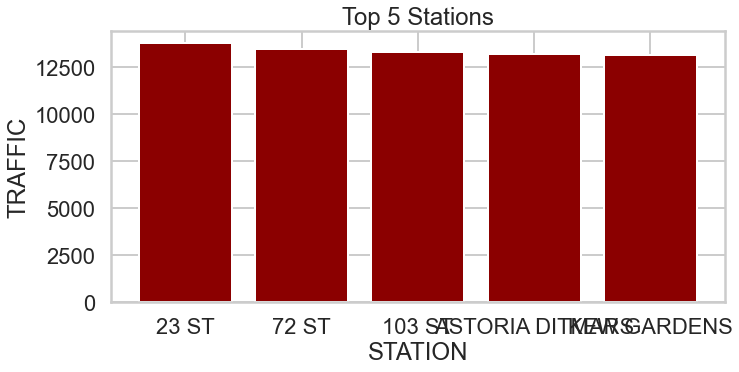

In [145]:
plt.figure(figsize=(11,5))

plt.bar(df_sorted['STATION'], df_sorted['Traffic'], color='darkred')

plt.xlabel('STATION')
plt.ylabel('TRAFFIC')
plt.title('Top 5 Stations')

plt.show()

### Top 5 Hours:

In [124]:
test = df_copy.groupby('Hour').count().sort_values(by='Traffic', ascending=False).head(5)

In [125]:
test

,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date_Time,Turnstiles_ID,Final_Entries,Final_Exits,Traffic,Month,Day of Week,Date,Day
Hour,,,,,,,,,,,,,,,,
8,302206,302206,302206,302206,302206,302206,302206,302206,302206,302206,302206,302206,302206,302206,302206,302206
12,300294,300294,300294,300294,300294,300294,300294,300294,300294,300294,300294,300294,300294,300294,300294,300294
20,300252,300252,300252,300252,300252,300252,300252,300252,300252,300252,300252,300252,300252,300252,300252,300252
16,300244,300244,300244,300244,300244,300244,300244,300244,300244,300244,300244,300244,300244,300244,300244,300244
4,299869,299869,299869,299869,299869,299869,299869,299869,299869,299869,299869,299869,299869,299869,299869,299869


In [126]:
top5_hours = df_copy.groupby('Hour')['Traffic'].sum().sort_values(ascending=False).head(5)

# top5_hours = df_copy.groupby('Hour')['Traffic'].sum().nlargest(5)

top5_hours

Hour
20    90424795.0
12    70272058.0
16    70249109.0
17    48338933.0
21    44418821.0
Name: Traffic, dtype: float64

In [127]:
top5_hours.index

Int64Index([20, 12, 16, 17, 21], dtype='int64', name='Hour')

In [128]:
top5_hours.values

array([90424795., 70272058., 70249109., 48338933., 44418821.])

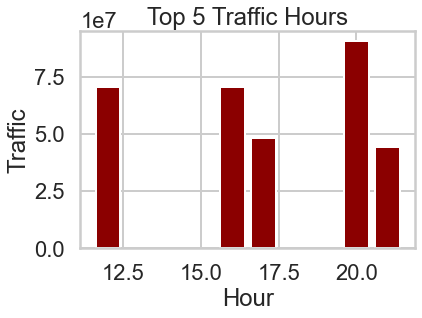

In [146]:
plt.bar(top5_hours.index, top5_hours.values, color='darkred')

plt.xlabel('Hour')
plt.ylabel('Traffic')
plt.title('Top 5 Traffic Hours')
plt.show()

### Correlation of traffic with hour, month, and date respectively:

In [130]:
df_copy.groupby('Hour').count().head(2)

,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date_Time,Turnstiles_ID,Final_Entries,Final_Exits,Traffic,Month,Day of Week,Date,Day
Hour,,,,,,,,,,,,,,,,
0,297356,297356,297356,297356,297356,297356,297356,297356,297356,297356,297356,297356,297356,297356,297356,297356
1,194719,194719,194719,194719,194719,194719,194719,194719,194719,194719,194719,194719,194719,194719,194719,194719


In [131]:
df_copy.groupby('Hour').count()['Traffic']

Hour
0     297356
1     194719
2      13435
3      40478
4     299869
5     197961
6      14894
7      45131
8     302206
9     197625
10     14068
11     43717
12    300294
13    197071
14     13846
15     43750
16    300244
17    197183
18     14210
19     43568
20    300252
21    197432
22     14518
23     43565
Name: Traffic, dtype: int64

Text(-39.0, 0.5, 'TRAFFIC')

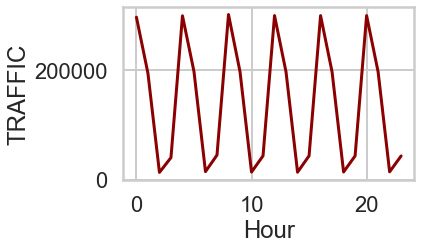

In [150]:
df_copy.groupby('Hour').count()['Traffic'].plot(color='darkred')

plt.tight_layout()
plt.ylabel('TRAFFIC') 

Text(-39.0, 0.5, 'TRAFFIC')

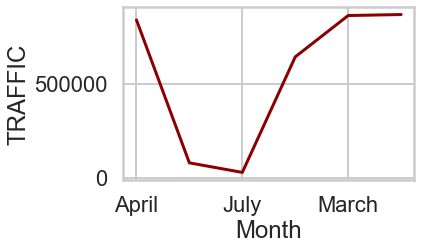

In [152]:
df_copy.groupby('Month').count()['Traffic'].plot(color='darkred')

plt.tight_layout()
plt.ylabel('TRAFFIC')

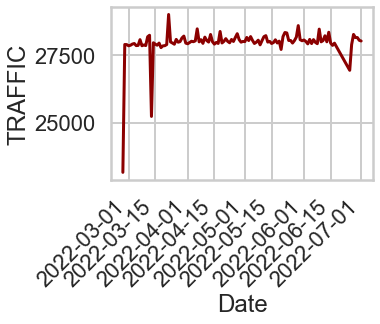

In [151]:
df_copy.groupby('Date').count()['Traffic'].plot(color='darkred')

plt.tight_layout()
plt.ylabel('TRAFFIC')

plt.xticks(rotation=45, ha='right');


### Total traffic by weekday:

In [135]:
df_traffic_by_weekday = df_copy.groupby('Day of Week')['Traffic'].sum().sort_values()

In [136]:
df_traffic_by_weekday

Day of Week
Sun    47792875.0
Sat    73317990.0
Mon    81863858.0
Fri    87945476.0
Tue    90485663.0
Thu    91625712.0
Wed    92497542.0
Name: Traffic, dtype: float64

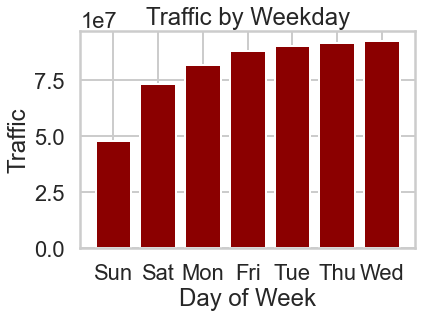

In [147]:
plt.bar(df_traffic_by_weekday.index, df_traffic_by_weekday.values, color='darkred')

plt.xlabel('Day of Week')
plt.ylabel('Traffic')
plt.title('Traffic by Weekday')
plt.show()

### Total traffic by Hour:

In [138]:
df_traffic_by_hour = df_copy.groupby('Hour')['Traffic'].sum().sort_values()

In [139]:
df_traffic_by_hour

Hour
6       370137.0
2      1236479.0
3      1622598.0
22     2517280.0
7      2605129.0
14     2613415.0
5      3297568.0
10     3586896.0
18     4359860.0
23     5534152.0
4      7578235.0
15     8008024.0
11    10844056.0
19    13059087.0
1     21797380.0
13    34871566.0
9     36108293.0
8     38236291.0
0     43578954.0
21    44418821.0
17    48338933.0
16    70249109.0
12    70272058.0
20    90424795.0
Name: Traffic, dtype: float64

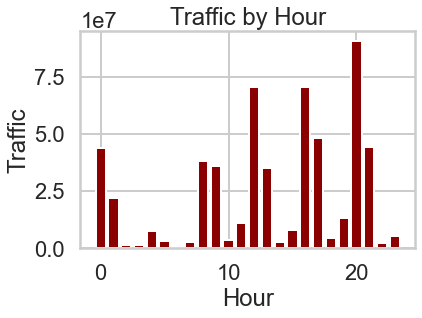

In [148]:
plt.bar(df_traffic_by_hour.index, df_traffic_by_hour.values, color='darkred')

plt.xlabel('Hour')
plt.ylabel('Traffic')
plt.title('Traffic by Hour')
plt.show()

### Total traffic by Month:

In [141]:
df_traffic_by_month = df_copy.groupby('Month')['Traffic'].sum().sort_values()
df_traffic_by_month

Month
July          4668155.0
February     10002021.0
June        126662310.0
April       136793570.0
May         143652571.0
March       143750489.0
Name: Traffic, dtype: float64

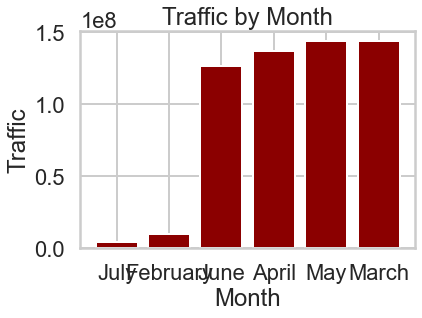

In [149]:
plt.bar(df_traffic_by_month.index, df_traffic_by_month.values, color='darkred')

plt.xlabel('Month')
plt.ylabel('Traffic')
plt.title('Traffic by Month')
plt.show()

### Total traffic by Day:

In [143]:
df_traffic_by_day = df_copy.groupby('Day')['Traffic'].sum().sort_values()
df_traffic_by_day 

Day
31    10567001.0
22    13269633.0
20    13329437.0
24    13576362.0
19    13760178.0
21    13784606.0
23    14033378.0
18    15536300.0
12    16427116.0
30    16950261.0
5     17294546.0
13    18125754.0
6     18236260.0
15    18502517.0
2     18638344.0
3     18649365.0
17    18729498.0
29    18817395.0
7     18906663.0
8     19026582.0
9     19096163.0
4     19187951.0
10    19328367.0
16    19414773.0
14    19453966.0
11    19731252.0
26    20241317.0
27    20635104.0
28    23499283.0
1     23585880.0
25    35193864.0
Name: Traffic, dtype: float64

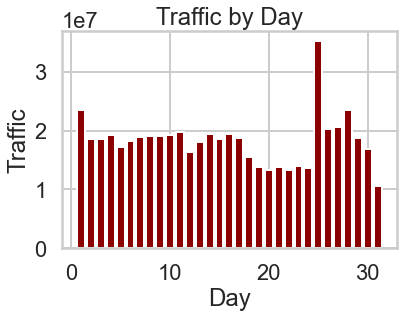

In [144]:
plt.bar(df_traffic_by_day.index, df_traffic_by_day.values, color='darkred')

plt.xlabel('Day')
plt.ylabel('Traffic')
plt.title('Traffic by Day')
plt.show()